# Project 3

In [1]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii 

import astropy.units as u
import astropy.constants as c

In [2]:
# Reading text file

spec = astropy.io.ascii.read("solar_spectrum.txt")

Text(0, 0.5, 'Normalized Flux')

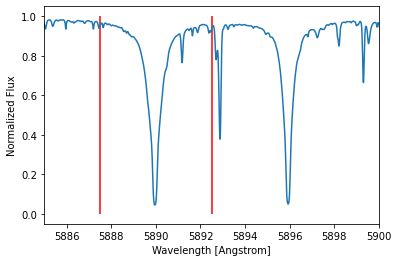

In [3]:
# Creating a Spcetroscopy Plot

plt.plot(spec["col1"], spec["col2"] / 1e4)
plt.vlines(5887.5, 0, 1, color="red")
plt.vlines(5892.5, 0, 1, color="red")
plt.xlim(5885, 5900)
plt.xlabel("Wavelength [Angstrom]")
plt.ylabel("Normalized Flux")

In [4]:
# Finding the eqiuvalent width

ind = np.where((spec["col1"] < 5892.5) & (spec["col1"] > 5887.5))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4
print("Equivalent Width (ew) = ", ew, " Angstroms")

Equivalent Width (ew) =  0.8346720000182191  Angstroms


# Question 1: What is the number density of Na atoms in the gorund state?

In [5]:
# Ground state number density

GSN = 10**14.8 / 0.65 / (5890 / 5000) / 1e14

print ("The number density of Na atoms in the ground state is", GSN, "atoms/cm^2")

The number density of Na atoms in the ground state is 8.240268309784437 atoms/cm^2


# Question 2: Whay is the number density of neutral Na atoms?

# Boltzman Equation


The boltzman equation is defined as $\frac{N_2}{N_1} = \frac{g_2}{g_1} * exp(-\frac{E_2-E_1}{kT})$. We will be using this equation to estimate the ratio of sodium atoms in the ground state to Na atoms in the excited state.

### Computing $\Delta E$ using $\Delta E = \frac{hc}{\lambda}$

In [6]:
delta_E = (c.h  * c.c )/(5890 * 10**-10 * u.m) # Need to convert units from Angstroms to meters


print ("The change in energy between the ground state and the excited state is", delta_E)

The change in energy between the ground state and the excited state is 3.372573611458283e-19 J


### Computing the exopnential $\exp(-\frac{\Delta E}{kT})$

In [7]:
expo = np.e**(-((delta_E)/(c.k_B * 5780 * u.K)))

print("The exponential value is equal to",expo)



The exponential value is equal to 0.014607756340799452


### Finding values for $g_1$ and $g_2$

Note that a ground state electron (3s) has 2 seperate states that are degenderate in energy, while an excited state electron (3p) has 6 seperate states that are degenerate in energy. These values can be found by noting that the 3s orbital state electron can either have a spin up or spin down, while the 3p electron can have an up or down spin and a magnetic quantum number of -1,0,1, leading to 6 seperate states. So,
$ g_1 = 2$ and $ g_2 = 6 $.



 ### Solving the boltzman equation for $ \frac{N_2}{N_1} $

In [8]:
ratio_exc_to_ground = (6/2) * expo

ratio_ground_to_exc = 1 / ratio_exc_to_ground



print("The ratio of sodium atoms in the excited state to sodium atoms in the ground state is", ratio_exc_to_ground,
     "or", ratio_ground_to_exc, "for the ratio of soidum atoms in the ground state to thsose in the excited state" )

The ratio of sodium atoms in the excited state to sodium atoms in the ground state is 0.04382326902239836 or 22.818927531145462 for the ratio of soidum atoms in the ground state to thsose in the excited state


In [9]:
N1 = 8.24e14

N2 = ratio_exc_to_ground * N1

NaNeutral = N1 + N2

print ("The number density of neutral Na atoms is", NaNeutral, " atoms/cm^2")

The number density of neutral Na atoms is 860110373674456.2  atoms/cm^2


# Question 3: What is the number density of Na atoms?

# Saha Equation

The Saha equation is defined as $\frac{Na_{2}}{Na_{I}} = \frac{2kT}{P_e} \frac{Z_{II}}{Z_I} \left(\frac{2\pi m_e kT}{h^2}\right)^{3/2}\exp{\left(-\frac{\chi}{kT}\right)}$ . We will be using this equation to estimate the ratio of neutral sodium atoms to ionized sodium atoms.

### Calculting the exponential $\exp(-\frac{\chi}{kT})$

In [10]:
exp2 = np.e**((-5.1 * u.electronvolt)/(c.k_B * 5780 * u.K))

print ("The exponential value is", exp2)

The exopnential value is 3.573854729672457e-05


### Calculating $(\frac{2\pi m_e kT}{h^2})^{3/2}$

In [11]:
secondterm2 = ( (2 * np.pi * 9.1e-31 * u.kg * c.k_B * 5780 * u.K)/(c.h**2))**(1.5)

print ("This term's value is", secondterm2)

secondterm2.decompose ()

This term's value is 1.0594500465024069e+27 kg(3/2) / (J(3/2) s3)


<Quantity 1.05945005e+27 1 / m3>

### Calculating the value of $\frac{2kT}{P_e} \frac{Z_{II}}{Z_I}$

In [12]:
firstterm2 = (2 * c.k_B * 5780 * u.K / ( u.N * u.m**(-2))) * (1/2.4)

print ("This term's value is", firstterm2)

firstterm2.decompose ()

This term's value is 6.650126016666667e-20 J m2 / N


<Quantity 6.65012602e-20 m3>

### Ratio of neutral sodium atoms to ionized sodium atoms

In [13]:
ratio_neu_to_ion = firstterm2 * secondterm2 * exp2

print ("The ratio of neutral sodium atoms to ionized sodium atoms is" ,
       ratio_neu_to_ion.decompose())

The ratio of neutral sodium atoms to ionized sodium atoms is 2517.950886046565


In [14]:
Ionized = NaNeutral * ratio_neu_to_ion

print ("The number density of ionized Na atoms is", Ionized, "atoms/cm^2")

The number density of ionized Na atoms is 2.165715677491439e+18 atoms/cm^2


# Question 4: Total Number Density of Na Atoms in All States

In [15]:
Total = NaNeutral + Ionized + GSN

print ("The total number density of Na atoms in all states is",Total, "atoms/cm^2")

The total number density of Na atoms in all states is 2.1665757878651136e+18 atoms/cm^2


# Findind the total number density of Na atoms in all states using the following equation $N_{1} \times (1+\frac{N_2}{N_1}) \times (1+\frac{Na_{II}}{Na_{I}}$)

The equation $N_{1} \times (1+\frac{N_2}{N_1})\times (1+\frac{Na_{II}}{Na_{I}}$) will be used, with both ratios being from problems 1 and 2, respectively. 

In [16]:
N1 = 8.24e14

coldensity = N1 * (1 + ratio_exc_to_ground) * (1 + ratio_neu_to_ion )

print ("The total column density of sodium atoms in the sun's photosphere is", coldensity)

The total column density of sodium atoms in the sun's photosphere is 2.1665757878651136e+18


As can be seen, the two above methods yield the same result for total number density of Na atoms in all states.

# Question 5: Abundances

### In Terms of Galactic Astronomy

In [17]:
GAbund = 12 + np.log10( (Total) / (6.6e23 ) )

print (GAbund)

6.5162299499245


### In Physicist Terms

In [18]:
PAbund = 10**6.3 / 10**12

print (PAbund)

1.9952623149688787e-06


### In Terms of Stellar Astronomy

In [19]:
SAbund = np.log10 ( (Total / 6.6e23) / (Total / 6.6e23))

print (SAbund)

0.0
